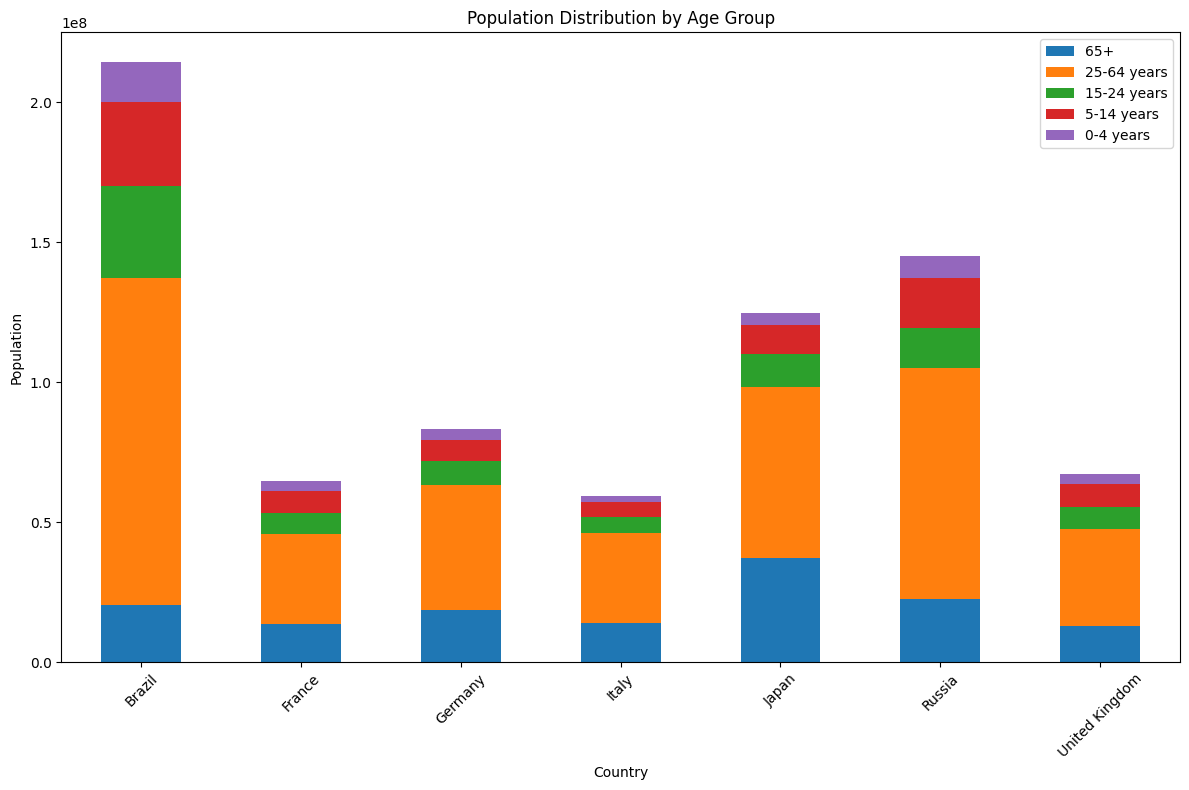

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('d1.csv')

# Select specific countries
selected_countries = ["Brazil", "Russia", "Japan", "Germany", "United Kingdom", "France", "Italy"]
df_selected = data[data['Country'].isin(selected_countries)]

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

# Bar chart for the distribution of population
df_selected.plot(kind='bar', x='Country', y=['65+', '25-64 years', '15-24 years', '5-14 years', '0-4 years'], stacked=True, ax=ax)

# Setting labels and title
ax.set_ylabel('Population')
ax.set_title('Population Distribution by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


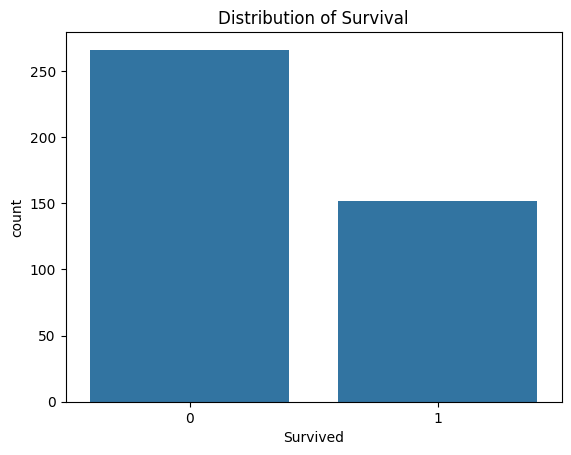

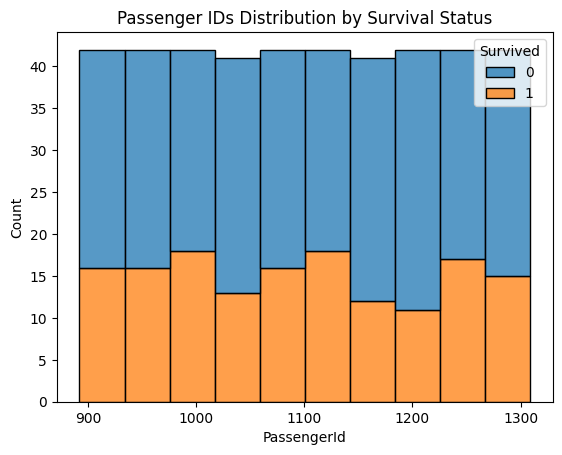

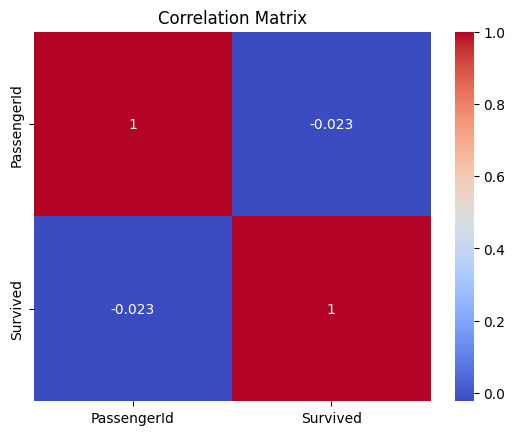

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('d2.csv')

# Data Cleaning
# Check for missing values
missing_values = data.isnull().sum()

# Since the dataset only contains PassengerId and Survived columns, there's no further cleaning needed

# Exploratory Data Analysis (EDA)
# Distribution of survival
sns.countplot(x='Survived', data=data)
plt.title('Distribution of Survival')
plt.show()

# Distribution of Passenger IDs for each survival status
sns.histplot(data=data, x='PassengerId', hue='Survived', multiple='stack')
plt.title('Passenger IDs Distribution by Survival Status')
plt.show()

# Correlation (even though with only two columns, it's trivial)
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Accuracy: 0.87
              precision    recall  f1-score   support

       False       0.93      0.92      0.93      1205
        True       0.42      0.44      0.43       152

    accuracy                           0.87      1357
   macro avg       0.68      0.68      0.68      1357
weighted avg       0.87      0.87      0.87      1357



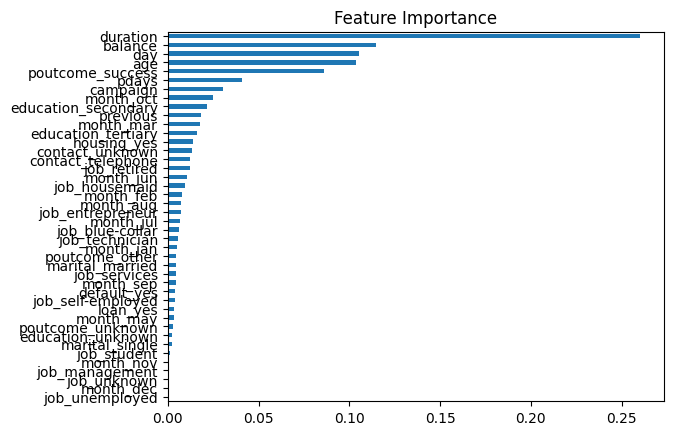

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('d3.csv', delimiter=';')

# Data preprocessing
# Convert categorical variables to dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)

# Separate the features (X) and the target variable (y)
X = data.drop('y_yes', axis=1)
y = data['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Visualize the importance of each feature
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()


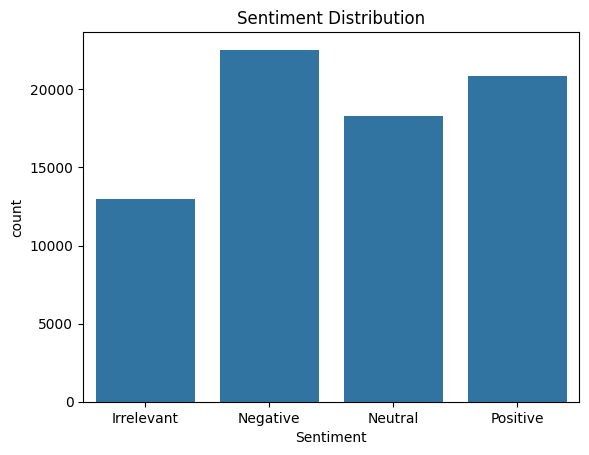

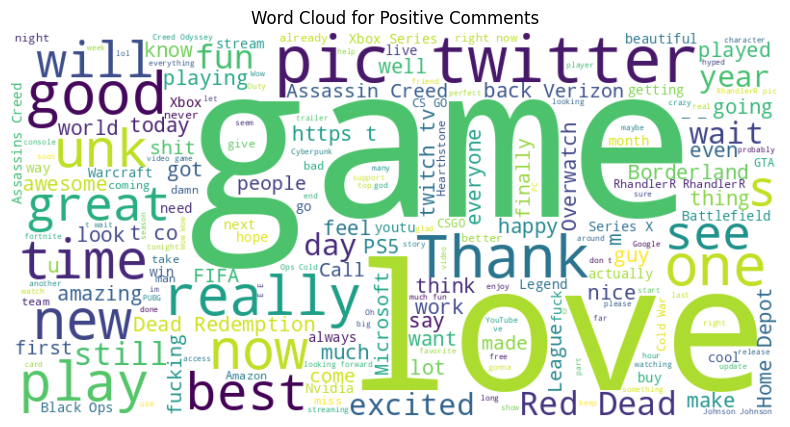

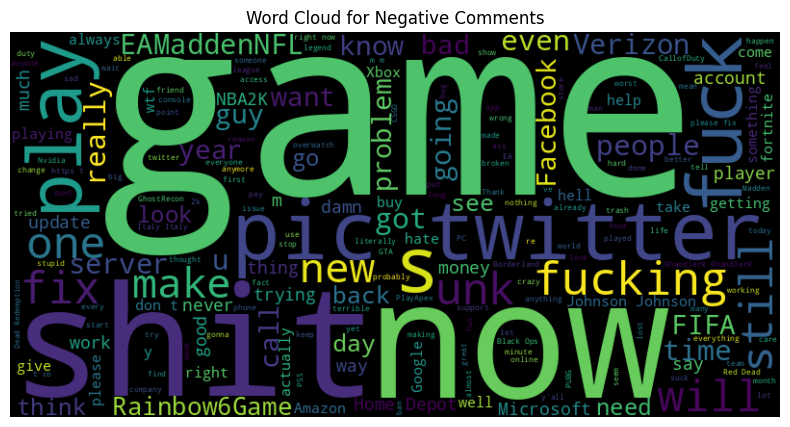

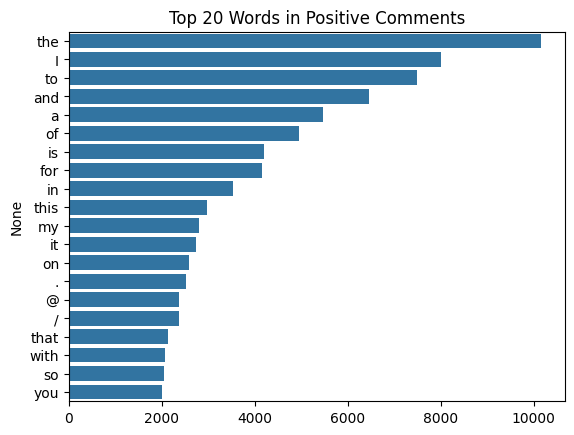

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv('d4.csv', header=None, names=['ID', 'Game', 'Sentiment', 'Comment'])

# Data Cleaning and Preprocessing
# Convert the 'Sentiment' column to categorical if necessary
data['Sentiment'] = data['Sentiment'].astype('category')

# Handle missing values in 'Comment'
data['Comment'].fillna('', inplace=True)

# Exploratory Data Analysis (EDA)
# Sentiment distribution
sns.countplot(x='Sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

# Word Cloud for Positive Sentiment
positive_comments = ' '.join(data[data['Sentiment'] == 'Positive']['Comment'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Comments')
plt.show()

# Word Cloud for Negative Sentiment (if it exists in the data)
if 'Negative' in data['Sentiment'].unique():
    negative_comments = ' '.join(data[data['Sentiment'] == 'Negative']['Comment'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_comments)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Negative Comments')
    plt.show()
else:
    print("No negative comments to analyze.")

# Analyze the most common words in positive comments
positive_words = pd.Series(' '.join(data[data['Sentiment'] == 'Positive']['Comment'].astype(str)).split()).value_counts()[:20]
sns.barplot(x=positive_words.values, y=positive_words.index)
plt.title('Top 20 Words in Positive Comments')
plt.show()


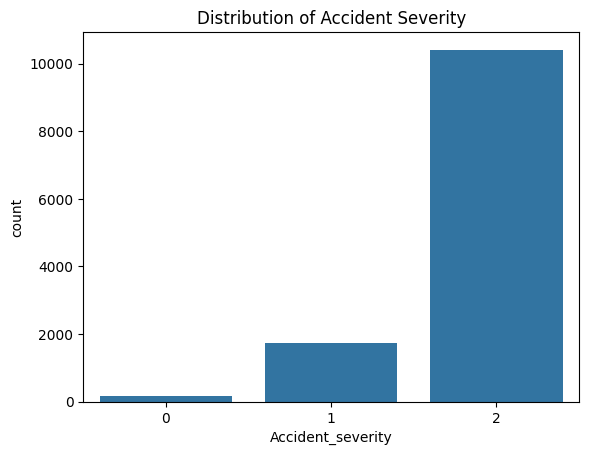

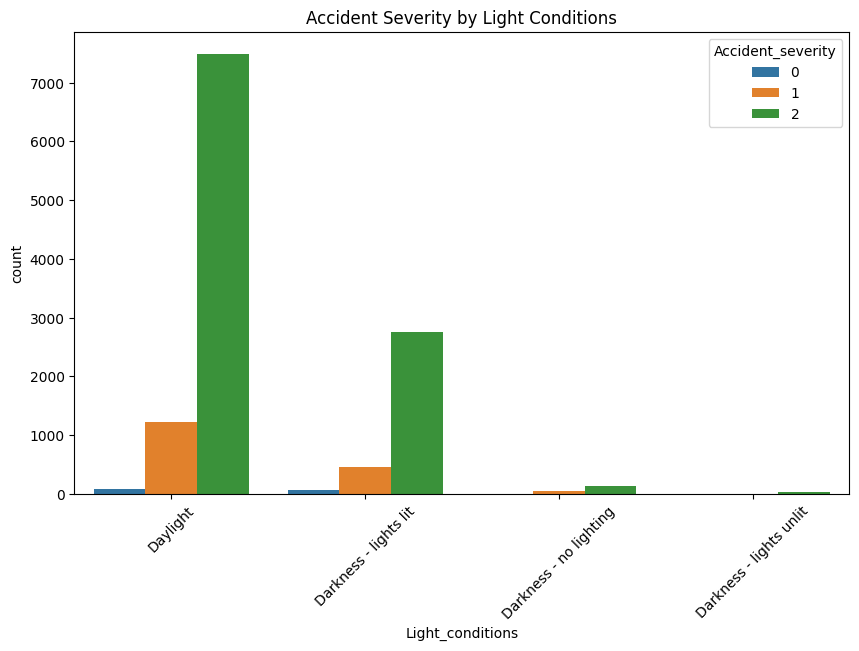

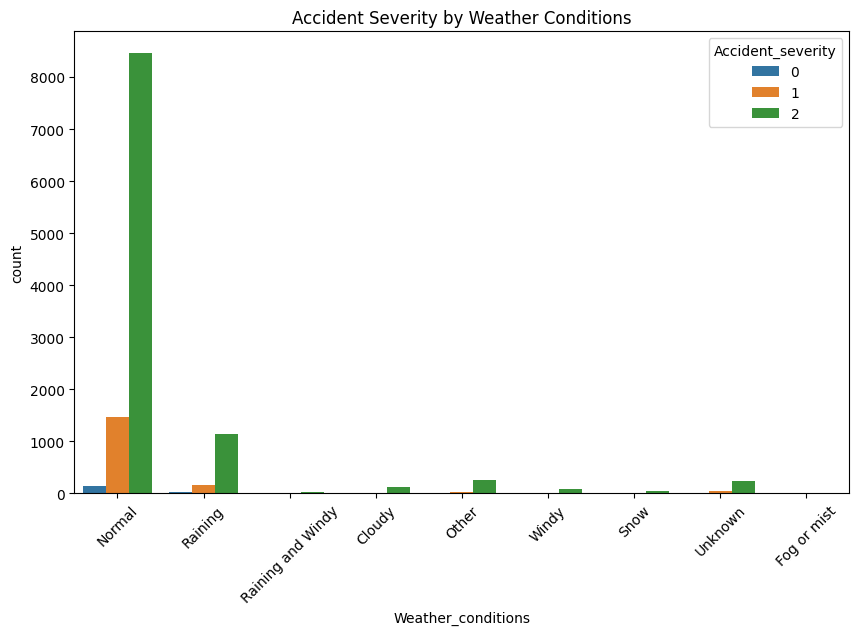

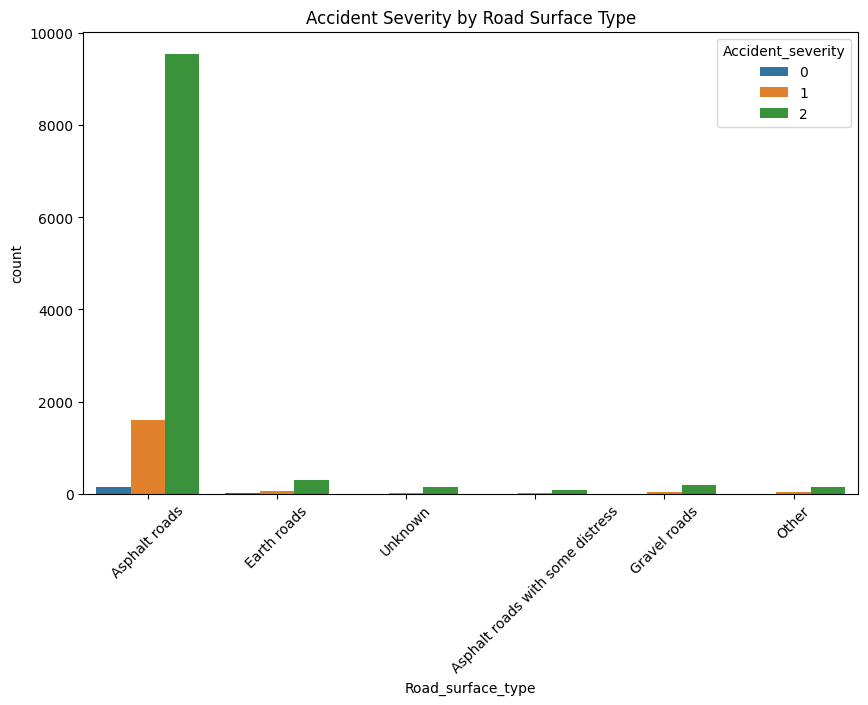

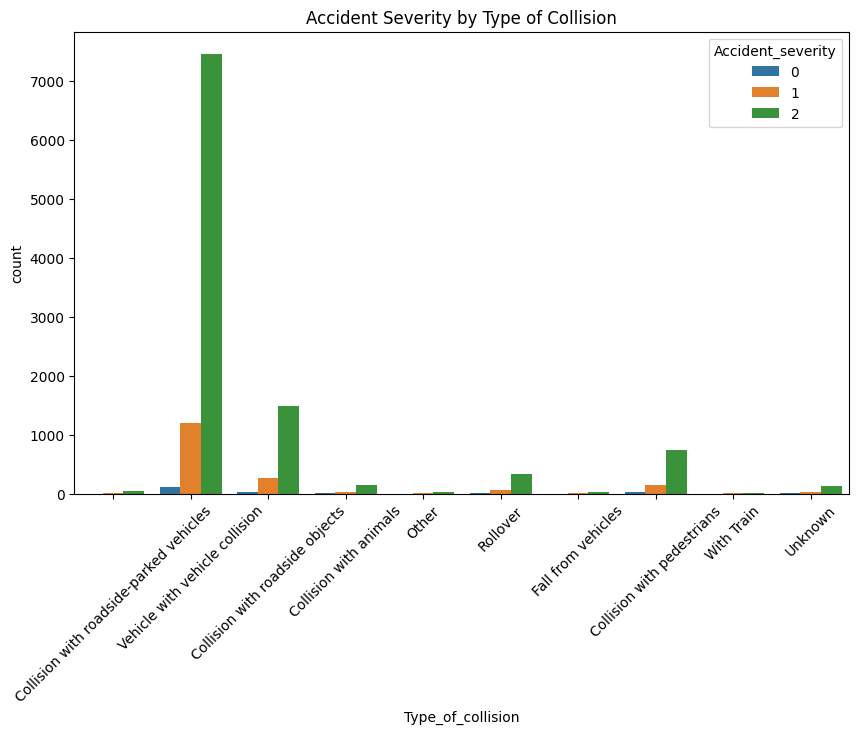

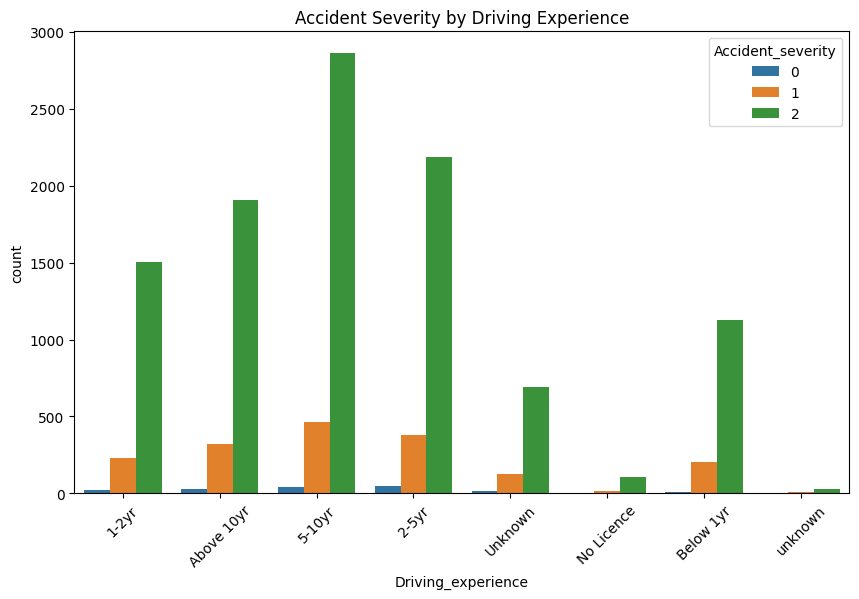

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('d5.csv')

# Data Cleaning and Preprocessing
# Convert categorical variables to category dtype
data['Accident_severity'] = data['Accident_severity'].astype('category')

# Exploratory Data Analysis (EDA)
# Distribution of accident severity
sns.countplot(x='Accident_severity', data=data)
plt.title('Distribution of Accident Severity')
plt.show()

# Accident severity by light conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Light_conditions', hue='Accident_severity', data=data)
plt.title('Accident Severity by Light Conditions')
plt.xticks(rotation=45)
plt.show()

# Accident severity by weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_conditions', hue='Accident_severity', data=data)
plt.title('Accident Severity by Weather Conditions')
plt.xticks(rotation=45)
plt.show()

# Accident severity by road surface type
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=data)
plt.title('Accident Severity by Road Surface Type')
plt.xticks(rotation=45)
plt.show()

# Accident severity by type of collision
plt.figure(figsize=(10, 6))
sns.countplot(x='Type_of_collision', hue='Accident_severity', data=data)
plt.title('Accident Severity by Type of Collision')
plt.xticks(rotation=45)
plt.show()

# Accident severity by driving experience
plt.figure(figsize=(10, 6))
sns.countplot(x='Driving_experience', hue='Accident_severity', data=data)
plt.title('Accident Severity by Driving Experience')
plt.xticks(rotation=45)
plt.show()
